In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# 1. Import necessary libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np  # Added numpy import which was missing

# 2. Load the dataset

In [22]:
# Fix: Use the specific file path you provided
file_path = r"C:\Users\DELL\OneDrive\Desktop\project\Mall_Customers.csv"
df = pd.read_csv(file_path)
print("Dataset Head:")
print(df.head())

Dataset Head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# 3. Drop non-numeric and irrelevant columns

In [24]:
df_clean = df.drop(['CustomerID', 'Gender'], axis=1)

# 4. Standardize the data

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


# 5. PCA (Optional: For 2D visualization)

In [26]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# 6. Elbow Method to find optimal k

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

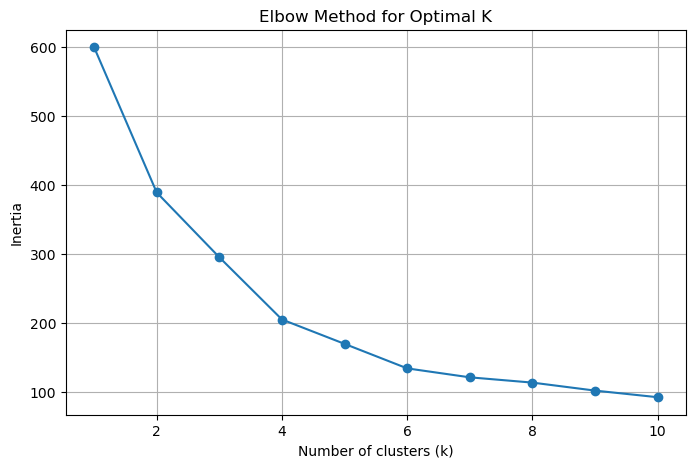

In [31]:
# Calculate inertia (sum of squared distances to closest centroid) for different k values
inertia = []
K = range(1, 11)  # Testing k from 1 to 10
for k in K:
    # Initialize KMeans with k clusters and fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to our scaled data
    kmeans.fit(df_scaled)
    # Store the inertia value (lower values mean tighter clusters)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph to find optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 7. Fit KMeans with optimal K (e.g., 5)

In [29]:
# Set the number of clusters to 5
k = 5
# Initialize KMeans algorithm with 5 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=k, random_state=42)
# Fit the model to the scaled data and predict cluster labels for each data point
labels = kmeans.fit_predict(df_scaled)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 8. Evaluate with Silhouette Score

In [18]:
sil_score = silhouette_score(df_scaled, labels)
print(f"\nSilhouette Score for k={k}: {sil_score:.2f}")


Silhouette Score for k=5: 0.41


# 9. Visualize Clusters in 2D using PCA

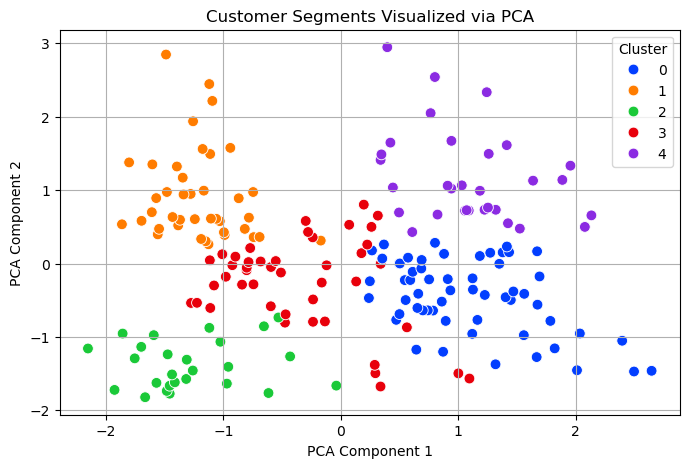

In [19]:
plt.figure(figsize=(8,5))
palette = sns.color_palette("bright", k)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=labels, palette=palette, s=60)
plt.title('Customer Segments Visualized via PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()